# Ejemplo de clasificacion

## Importar librerias

In [1]:
# !pip install xgboost
# !pip install lightgbm


In [2]:
# ! apt install -qq enchant
# ! apt install myspell-en
# ! pip install pyenchant

In [3]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

## Exploracion Dataset

In [4]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth',300)


In [5]:
# Importo el dataset
#df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv', error_bad_lines=False) # Hay que subir el dataset cada vez que se quiere trabajar sobre este script. Montar el drive creo que no va a ser práctico.
df = pd.read_csv('../Datasets/tripadvisor_hotel_reviews.csv')
df.shape

(20491, 2)

In [6]:
df.head(10)

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music...",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites descr...",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't pro...",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake f...",5
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called sta...",5
5,"love monaco staff husband stayed hotel crazy weekend attending memorial service best friend husband celebrating 12th wedding anniversary, talk mixed emotions, booked suite hotel monte carlos, loaned beautiful fan-tanned goldfish named joliet weekend visited dogs worked desk human companions, roo...",5
6,"cozy stay rainy city, husband spent 7 nights monaco early january 2008. business trip chance come ride.we booked monte carlo suite proved comfortable longish stay, room 905 located street building, street noise not problem view interesting rooms building look dank alley midsection large office b...",5
7,"excellent staff, housekeeping quality hotel chocked staff make feel home, experienced exceptional service desk staff concierge door men maid service needs work, maid failed tuck sheets foot bed instance soiled sheets used, staff quickley resolved soiled sheets issue, guess relates employee not r...",4
8,"hotel stayed hotel monaco cruise, rooms generous decorated uniquely, hotel remodeled pacific bell building charm sturdiness, everytime walked bell men felt like coming home, secure, great single travelers, location fabulous, walk things pike market space needle.little grocery/drug store block aw...",5
9,"excellent stayed hotel monaco past w/e delight, reception staff friendly professional room smart comfortable bed, particularly liked reception small dog received staff guests spoke loved, mild negative distance uphill ppmarket restaurants 1st, overall great experience,",5


In [7]:
print("Cantidad de targets: ")
df.Rating.value_counts()

Cantidad de targets: 


5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [8]:
# Creo un nuevo target donde 0 es detractor y 1 es promotor

conditions = [df.Rating.isin([1,2]), df.Rating.isin([3]), df.Rating.isin([4,5])]
values = [0,0,1]

df['Cluster'] =np.select(conditions, values)
df['Review_original'] = df['Review']


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=10):
    cv = CountVectorizer()
    corpus_matrix = cv.fit_transform(corpus)
    corpus_matrix = pd.DataFrame.sparse.from_spmatrix(corpus_matrix, columns=cv.get_feature_names())
    aux = corpus_matrix.sum()
    aux=aux.to_frame('count')
    aux.sort_values(by='count',ascending=False,inplace=True)
    aux=aux.head(n)
    return aux

In [10]:
import plotly.express as px

# Cantidad de tokens en todo el corpus
most_importants = get_top_n_words(df.Review, n=500)
print(most_importants.head(10))
px.bar(most_importants, x=most_importants.index, y='count')

d:\venv_python\text_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


       count
hotel  49814
room   35331
not    31709
great  21475
good   17412
staff  16633
stay   15411
did    14006
just   12667
nice   12643


In [11]:
# Cantidad de tokens para Detractores
most_importants = get_top_n_words(df[df.Cluster == 0].Review, n=500)
detractores = set(most_importants.index[:100])
print(most_importants.head(10))
px.bar(most_importants, x=most_importants.index, y='count')

d:\venv_python\text_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



       count
not    13819
hotel  13081
room   12331
no      5323
did     5096
good    4664
stay    4073
rooms   3853
staff   3820
just    3542


In [12]:
# # Cantidad de tokens para Neutros
# most_importants = get_top_n_words(df[df.Cluster == 1].Review, n=500)
# neutros = set(most_importants.index[:20])
# print(most_importants.head(10))
# px.bar(most_importants, x=most_importants.index, y='count')

In [13]:
# Cantidad de tokens para promotores
most_importants = get_top_n_words(df[df.Cluster == 1].Review, n=500)
promotores = set(most_importants.index[:100])
print(most_importants.head(10))
px.bar(most_importants, x=most_importants.index, y='count')

d:\venv_python\text_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



          count
hotel     36733
room      23000
great     18455
not       17890
staff     12813
good      12748
stay      11338
nice       9402
just       9125
location   8951


In [14]:
print(promotores)
# print(neutros)
print(detractores)

{'nights', 'want', 'say', 'city', 'best', 'stay', 'booked', 'comfortable', 'make', 'took', 'away', 'desk', 'went', 'not', 'time', 'walking', 'loved', 'resort', 'friendly', 'definitely', 'fantastic', 'minutes', 'walk', 'free', 'days', 'morning', 'helpful', 'bit', 'did', 'pool', 'problem', 'view', 'stayed', 'new', 'got', 'big', 'area', 'recommend', 'water', 'check', 'value', 'place', 'rooms', 'food', 'airport', 'beautiful', 'station', 'quite', 'the', 'hotels', 'little', 'no', 'breakfast', 'bar', 'floor', 'lot', 'wonderful', 'restaurants', 'staff', 'day', 'better', 'lobby', 'clean', 'trip', 'experience', 'room', 'restaurant', 'just', 'location', '10', 'enjoyed', 'great', 'street', 'people', 'lovely', 'shower', 'quiet', 'like', 'price', 'large', 'small', 'right', 'service', 'buffet', 'reviews', 'perfect', 'nice', 'really', 'good', 'hotel', 'bathroom', 'bed', 'we', 'night', 'week', 'close', 'going', 'beach', 'excellent', 'way'}
{'nights', 'want', 'say', 'best', 'stay', 'booked', 'think', 'm

In [15]:
# neutros-detractores # 20 palabras más comunes de los detractores y neuros son iguales.

In [16]:
# Dentro de las 100 palabras más comunes de promotores, las que se muestran son las que no se repiten con promotores y detractores.
diferencia = promotores-detractores
diferencia

{'airport',
 'big',
 'city',
 'close',
 'comfortable',
 'definitely',
 'enjoyed',
 'excellent',
 'fantastic',
 'helpful',
 'large',
 'loved',
 'lovely',
 'perfect',
 'quiet',
 'recommend',
 'station',
 'street',
 'value',
 'walking',
 'we',
 'wonderful'}

In [17]:
palabras_comunes = detractores - diferencia
len(palabras_comunes)

100

## Proceso NLP

In [18]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
# nltk.download('stopwords')
# nltk.download('punkt')
import string
stop_words = set(stopwords.words('english'))
stop_words.update(string.punctuation)
stop_words.update(['stay', 'stayed', 'service', 'got', 'room', 'night', 'food', 'did', 'rooms', 
'day', 'resort', 'hotel', 'beach', 'staff'])
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
import string
import gensim
import re

In [19]:
lista = []
for palabra in df.Review:
  string_encode = palabra.encode("ascii", "ignore")
  string_decode = string_encode.decode()
  lista.append(string_decode)
  #print(string_decode)

df['Review'] = lista

In [31]:
# import enchant
# from nltk.metrics import edit_distance
# class SpellingReplacer(object):
#   def __init__(self, dict_name='en', max_dist=2):
#     self.spell_dict = enchant.Dict(dict_name)
#     self.max_dist = max_dist
#   def replace(self, word):
#     if self.spell_dict.check(word):
#       return word
#     suggestions = self.spell_dict.suggest(word)
#     if suggestions and edit_distance(word, suggestions[0]) <= self.max_dist:
#       return suggestions[0]
#     else:
#       return word



def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def ch_sep(text):
  """
  Toma un texto y separa los characteres especiales para que sean tomados a parte
  """
  clean_text =' '.join(re.findall(r"[^,.:;_~=/'/+/-]+|[,.:;_~=/'/+/-]", text))
  return clean_text


# Pre procesamiento basico, agregar las etapas que considere necesario
def pre_procesamiento_texto(text):
  # Armo los tokens para procesar los datos
  
  tokens = word_tokenize(text)

  # Elimino las stopwords
  tokens = [t.lower() for t in tokens if t.lower() not in stop_words]
  tokens = [re.sub('\s+', ' ', sent) for sent in tokens]
  tokens = [re.sub('\d', ' ', sent) for sent in tokens] #Elimino los numeros
  tokens = [re.sub(' +', ' ', sent) for sent in tokens] #Elimino multiples espacios en blanco
  #tokens = [re.sub(r"\s\s+",' ', sent) for sent in tokens] #Elimino multiples espacios en blanco
  tokens = [str(sent).strip() for sent in tokens] # elimina espacios en blanco antes y despues del token
  tokens = [re.sub('[^A-Za-z0-9]+', ' ', sent) for sent in tokens] #elimina los caracteres especiales

  # replacer = SpellingReplacer()
  # tokens_corr = [replacer.replace(word) for  word in tokens if word not in ['']] La idea esta buena pero tarda demasiado en procesar con esta linea de codigo
  

  stemer = []
  for p in tokens:
    stemer.append(stemmer.stem(p))
  
  stemer = [word for word in stemer if  word in columnas] #Esto solo se agrega cuando ya se tienen las palabras a eliminar de la matriz

  return stemer

Le agregué funciones que limpian los caracteres.
El preprocesamiento no está haciendo bien el stemmer, hay muchas palabras similares, quizas se puede intentar con 
* Lemmatization
* Corrector ortográfico

In [32]:
df.Review = df.Review.apply(ch_sep)

In [33]:
# pre_procesamiento_texto(df['Review'].values[0])

In [34]:
# replacer = SpellingReplacer()
# replacer.replace('sandwihc')

In [35]:
# replacer = SpellingReplacer()
# print(replacer.replace('airportwe'))


## Vectorizacion resultados

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.Review, df.Cluster,test_size=.30)

In [38]:
# Vectorizacion de resultados BOW, tambien se puede probar TF-IDF
#cv = CountVectorizer(tokenizer=pre_procesamiento_texto)
cv = TfidfVectorizer(tokenizer=pre_procesamiento_texto)
X_train_transform = cv.fit_transform(X_train) # Armo matriz para entrenar

In [39]:
X_train_transform

<14343x13512 sparse matrix of type '<class 'numpy.float64'>'
	with 1011191 stored elements in Compressed Sparse Row format>

In [40]:
df_tranform = pd.DataFrame.sparse.from_spmatrix(X_train_transform, columns=cv.get_feature_names_out())
df_tranform

,a,aa,aaa,aalder,ab,aback,abandon,abat,abba,abbay,...,zona,zone,zoo,zoogarten,zoolog,zoologisch,zoom,zoran,zucca,zurich
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.136862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14338,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14339,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14340,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14341,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# #Solo me quedo con las primeras 14000 palabras (Una vez obtenidas las palabras principales se modifica la función de preprocesamiento)
# del df_tranform['']
# columnas = list(df_tranform.sum().sort_values(ascending = False).iloc[:14000].index)
# df_transform = df_tranform[columnas]


In [43]:
aux = df_tranform.sum().to_frame('count')
aux.sort_values(by='count',ascending=False,inplace=True)
aux=aux.head(400)
px.bar(aux, x=aux.index, y='count')

In [ ]:
print("Vocabulario de ", len(cv.get_feature_names()))

Vocabulario de  13430


d:\venv_python\text_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
X_train_transform.shape

(14343, 13530)

In [ ]:
X_train_transform

<14343x13530 sparse matrix of type '<class 'numpy.float64'>'
	with 1003589 stored elements in Compressed Sparse Row format>

Se puede ver que tenemos mas features que observaciones. Si se utiliza algun metodo de algebra lineal se necesitan tener al menos la misma cantidad de observaciones que de incognitas, sino existiran infinitas soluciones haciendo que el modelo no generalize correctamente. 

Es recomendable utilizar tecnicas de Cross 
Validation,  reduccion de dimencionalidad y seleccion de features.

## Modelo Regresion Logistica

In [ ]:
clf = LogisticRegression()#multi_class = 'multinomial')
clf.fit(X_train_transform, y_train)

LogisticRegression()

### Resultados obtenidos

In [ ]:
X_test_tranform = cv.transform(X_test) 
y_pred = clf.predict(X_test_tranform.toarray())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1606
           1       0.90      0.96      0.93      4542

    accuracy                           0.90      6148
   macro avg       0.89      0.83      0.86      6148
weighted avg       0.89      0.90      0.89      6148



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1134  472]
 [ 168 4374]]


d:\venv_python\text_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



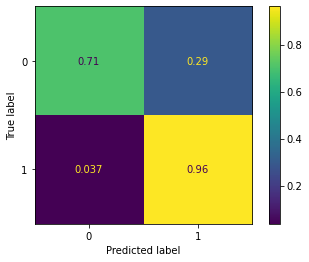

In [ ]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
plot_confusion_matrix(clf,X_test_tranform,y_test,normalize='true')

## Modelo SVM

**Support vector machines** (SVM) son un conjunto de métodos de aprendizaje supervisados classification, regression y outliers detection.

Las ventajas de los SVM son:<br>
  * Efectivo en espacios de altas dimensiones.
  * Sigue siendo efectivo en casos donde el número de dimensiones es mayor que el número de muestras, pero dependera del nivel de regularizacion
  * Utiliza un subconjunto de puntos de entrenamiento en la función de decisión (llamados vectores de soporte), por lo que también es eficiente en la memoria.
  * Versátil: se pueden especificar diferentes funciones de Kernel para la función de decisión. Se proporcionan núcleos comunes, pero también es posible especificar núcleos personalizados.

Las desventajas de los SVM son:<br>
  * Si el número de características es mucho mayor que el número de muestras, se necesita evitar el ajuste excesivo al elegir las funciones de Kernel y el término de regularización es crucial.
  * Los SVM no proporcionan directamente estimaciones de probabilidad, estas se calculan utilizando una costosa validación cruzada.    

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_transform, y_train)

LinearSVC()

### Resultados obtenidos

In [ ]:
y_pred = clf.predict(X_test_tranform)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1606
           1       0.91      0.94      0.93      4542

    accuracy                           0.89      6148
   macro avg       0.86      0.84      0.85      6148
weighted avg       0.89      0.89      0.89      6148



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1197  409]
 [ 268 4274]]


d:\venv_python\text_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



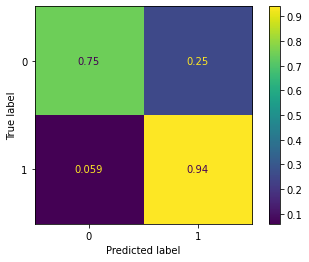

In [ ]:
plot_confusion_matrix(clf,X_test_tranform,y_test,normalize='true')

## Modelo lightgbm


In [ ]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf.fit(X_train_transform, y_train)

LGBMClassifier()

### Resultados obtenidos

In [ ]:
y_pred = clf.predict(X_test_tranform)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.75      1606
           1       0.90      0.95      0.92      4542

    accuracy                           0.88      6148
   macro avg       0.87      0.82      0.84      6148
weighted avg       0.88      0.88      0.88      6148



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1101  505]
 [ 216 4326]]


d:\venv_python\text_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



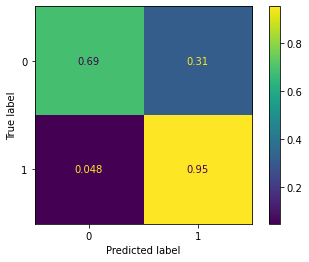

In [ ]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix,plot_precision_recall_curve
plot_confusion_matrix(clf,X_test_tranform,y_test,normalize='true')